## DSI-13 Hackathon, Restaurant Revenue Prediction, Sid Carter
## Predict annual restaurant sales based on objective measurements

### Import libraries and modules

In [1]:
# database manipulation
import pandas as pd
import numpy as np

# data graphing
import matplotlib.pyplot as plt
import seaborn as sns

# data transformation
from sklearn.preprocessing import StandardScaler

# estimator models
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor


# model metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

# model validation
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Pipeline and grid search modules
from sklearn.model_selection import GridSearchCV


print('finished imports')

finished imports


In [2]:
# cd C:\Users\pozzo\Desktop\SAC\Data Science\GA DS Immersive\Projects\project_4_hackathon\data

## Load data

In [3]:
eatz_0 = pd.read_csv("../data/train.csv")

print(eatz_0.shape)
eatz_0.head(3);

(137, 43)


In [4]:
features = eatz_0.columns
features

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

## Inspect data for integrity

In [5]:
# check columns for compromised data; it's all good

eatz_0.isnull().sum();

## EDA Phase 1 - Inspect and engineer columns 

In [6]:
eatz_0.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

In [7]:
# inspect variable Open Date towards determing age of restaurants

gb_Open_date=eatz_0.groupby(['Open Date']).count()
gb_Open_date.shape

(134, 42)

In [8]:
# convert 'Open Date' to date format
# https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

eatz_0['Open Date']= pd.to_datetime(eatz_0['Open Date'])

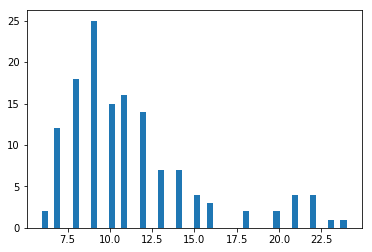

In [9]:
# add an age column and inspect distribution of restaurants' ages

eatz_0['open_year'] = eatz_0['Open Date'].dt.year
eatz_0['age'] = 2020 - eatz_0['open_year']
eatz_0['age'].describe()
plt.hist(eatz_0['age'], bins=50);

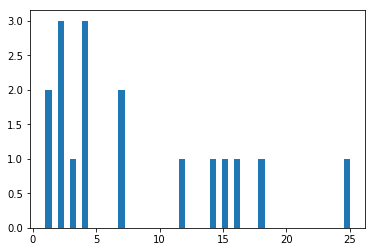

In [10]:
gb_age=eatz_0.groupby(['age']).count()
gb_age=eatz_0.groupby(['age']).count()

age_buff = gb_age['Id']
age_buff
plt.hist(age_buff, bins=50);
# gb_age
# gb_age.shape

### EDA - Inspect revenue

In [11]:
eatz_0.shape

(137, 45)

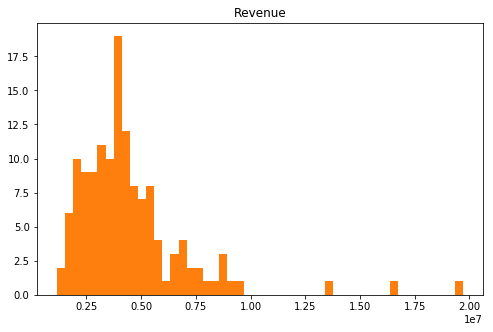

In [12]:
# inspect distribution of revenues; note that Kaggle notes that revenue data is transformed; note threeoutliers

plt.figure(figsize = (8, 5))
eatz_0['revenue'].describe()
plt.hist(eatz_0['revenue'], bins=50);
plt.title('Revenue')
plt.hist(eatz_0['revenue'], bins=50);

In [13]:
eatz_1 = eatz_0.drop(eatz_0[eatz_0['revenue'] > 10000000].index)
eatz_1.shape

(134, 45)

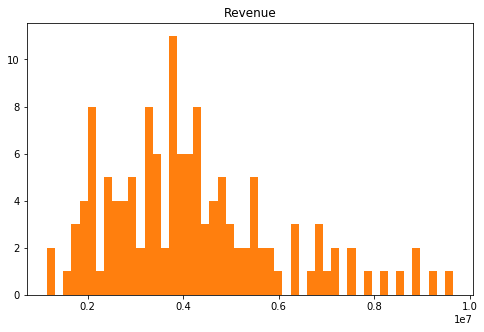

In [14]:
plt.figure(figsize = (8, 5))
eatz_1['revenue'].describe()
plt.hist(eatz_1['revenue'], bins=50);
plt.title('Revenue')
plt.hist(eatz_1['revenue'], bins=50);

Text(0.5, 1.0, 'Revenue, logged')

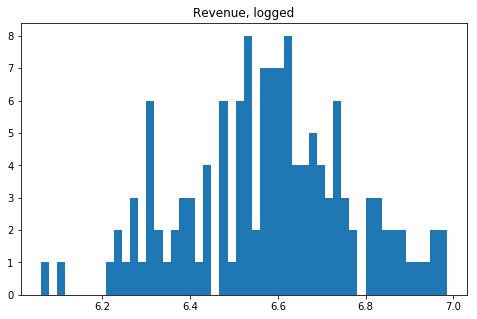

In [15]:
# log-transform revenue and plot histogram

plt.figure(figsize = (8, 5))
eatz_1['rev_log'] =np.log10(eatz_1['revenue'])
eatz_1['rev_log'].describe()
plt.hist(eatz_1['rev_log'], bins=50);
plt.title('Revenue, logged')

Text(0.5, 1.0, 'Revenue, root')

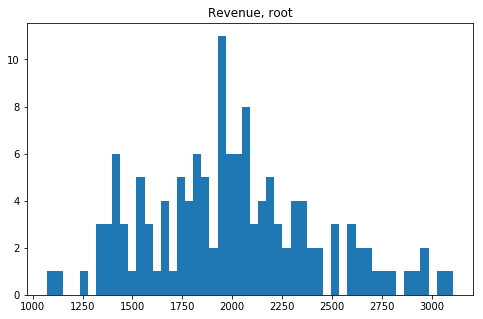

In [16]:
# Square-transform revenue and plot histogram


plt.figure(figsize = (8, 5))
eatz_1['rev_root'] =np.sqrt(eatz_1['revenue'])
eatz_1['rev_root'].describe()
plt.hist(eatz_1['rev_root'], bins=50);
plt.title('Revenue, root')

In [17]:
eatz_2=eatz_1
eatz_2.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue', 'open_year', 'age', 'rev_log', 'rev_root'],
      dtype='object')

### EDA - Inspect categorical variables

In [18]:
# inspect categorical variable City Group; how many categories are there?
# There are two - Big Cities and Other
# Dummify

gb_City_Group=eatz_2.groupby(['City Group']).count()
gb_City_Group.shape

(2, 46)

In [19]:
# Dummify "City Group"

eatz_3 = pd.get_dummies(columns=["City Group"], drop_first=True, data=eatz_2)

In [20]:
# inspect categorical variable Type; how many categories are there?
# There are three - FC: Food Curt; IL: Inline (strip mall); DT: Drive-thru
# Dummify

gb_Type=eatz_3.groupby(['Type']).count()
gb_Type=eatz_3.groupby(['Type']).count()
gb_Type.shape

(3, 46)

In [21]:
# Dummify "Type"

eatz_4 = pd.get_dummies(columns=["Type"], drop_first=True, data=eatz_3)

In [22]:
eatz_4.columns

Index(['Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue', 'open_year', 'age', 'rev_log', 'rev_root',
       'City Group_Other', 'Type_FC', 'Type_IL'],
      dtype='object')

In [23]:
col_name="rev_root"
rev_col=eatz_4.pop(col_name)
eatz_4.insert(0, col_name, rev_col)

col_name="rev_log"
rev_col=eatz_4.pop(col_name)
eatz_4.insert(0, col_name, rev_col)

col_name="revenue"
rev_col=eatz_4.pop(col_name)
eatz_4.insert(0, col_name, rev_col)
eatz_4.head(4)


,revenue,rev_log,rev_root,Id,Open Date,City,P1,P2,P3,P4,...,P33,P34,P35,P36,P37,open_year,age,City Group_Other,Type_FC,Type_IL
0,5653753.0,6.752337,2377.762183,0,1999-07-17,İstanbul,4,5.0,4.0,4.0,...,5,5,4,3,4,1999,21,0,0,1
1,6923131.0,6.840303,2631.184334,1,2008-02-14,Ankara,4,5.0,4.0,4.0,...,0,0,0,0,0,2008,12,0,1,0
2,2055379.0,6.312892,1433.659304,2,2013-03-09,Diyarbakır,2,4.0,2.0,5.0,...,0,0,0,0,0,2013,7,1,0,1
3,2675511.0,6.427407,1635.698933,3,2012-02-02,Tokat,6,4.5,6.0,6.0,...,6,18,12,12,6,2012,8,1,0,1


## EDA

## Null model

In [24]:
print('Null model estimate: {:>10,.0f}'.format(eatz_4['revenue'].mean()))

Null model estimate:  4,181,438


In [25]:
# eatz_1['revenue']

# plt.hist(eatz_4['revenue'], bins=50);

In [26]:
# inspect data's descriptive statistics
eatz_4.describe()
eatz_4.columns

Index(['revenue', 'rev_log', 'rev_root', 'Id', 'Open Date', 'City', 'P1', 'P2',
       'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13',
       'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23',
       'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33',
       'P34', 'P35', 'P36', 'P37', 'open_year', 'age', 'City Group_Other',
       'Type_FC', 'Type_IL'],
      dtype='object')

In [27]:
cols_list=eatz_4.columns
cols_list

Index(['revenue', 'rev_log', 'rev_root', 'Id', 'Open Date', 'City', 'P1', 'P2',
       'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13',
       'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23',
       'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33',
       'P34', 'P35', 'P36', 'P37', 'open_year', 'age', 'City Group_Other',
       'Type_FC', 'Type_IL'],
      dtype='object')

In [28]:
features = cols_list
# ['revenue', 'rev_2', 'Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5',
#        'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
#        'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
#        'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
#        'P37', 'open_year', 'age', 'City Group_Other', 'Type_FC', 'Type_IL']

In [29]:
eatz_X=eatz_4[features]
Corrs=eatz_X.corr()
# Corrs['0']

# https://stackoverflow.com/questions/15360925/how-to-get-the-first-column-of-a-pandas-dataframe-as-a-series

# Corrs.columns
# Corrs.iloc[:,0].sort_values(by=['revenue'])

Corrs.sort_values(by=['revenue'], ascending=False)
# Corrs['revenue']

,revenue,rev_log,rev_root,Id,P1,P2,P3,P4,P5,P6,...,P33,P34,P35,P36,P37,open_year,age,City Group_Other,Type_FC,Type_IL
revenue,1.000000,0.963103,0.991131,0.035886,0.106975,0.217491,0.011755,0.057928,0.002373,0.125315,...,0.010659,-0.068246,-0.038330,-0.038126,0.003478,-0.202740,0.202740,-0.211989,0.086291,-0.083323
rev_root,0.991131,0.990170,1.000000,0.034864,0.118271,0.219149,0.027570,0.071353,0.016958,0.141554,...,0.035042,-0.050353,-0.018793,-0.018913,0.033692,-0.223911,0.223911,-0.198996,0.063732,-0.062163
rev_log,0.963103,1.000000,0.990170,0.036653,0.127019,0.215257,0.043077,0.084395,0.030545,0.156076,...,0.059618,-0.030041,0.002072,0.002028,0.063449,-0.242897,0.242897,-0.181963,0.038858,-0.038850
P2,0.217491,0.215257,0.219149,-0.036334,0.838885,1.000000,0.477588,0.542889,0.206367,0.672183,...,0.238867,0.397430,0.317964,0.391217,0.163148,-0.161109,0.161109,-0.417732,-0.130702,0.144693
age,0.202740,0.242897,0.223911,0.130339,0.091001,0.161109,0.028092,-0.011922,-0.115942,0.175689,...,0.135228,0.091608,0.051479,0.106275,0.174345,-1.000000,1.000000,-0.148095,-0.091217,0.076489
P28,0.190908,0.218903,0.207135,0.028128,0.845818,0.734997,0.649976,0.644160,0.330666,0.734705,...,0.265814,0.450661,0.340990,0.455599,0.212866,-0.122720,0.122720,-0.296379,-0.095277,0.103271
P6,0.125315,0.156076,0.141554,-0.020874,0.751361,0.672183,0.575940,0.600422,0.330282,1.000000,...,0.307028,0.525265,0.419852,0.530788,0.333469,-0.175689,0.175689,-0.412403,-0.159960,0.148561
P23,0.114357,0.160208,0.139275,-0.001658,0.702550,0.518695,0.602103,0.558196,0.356427,0.492507,...,0.318103,0.473079,0.404140,0.452355,0.220578,-0.044638,0.044638,-0.012654,-0.215070,0.220207
P1,0.106975,0.127019,0.118271,-0.030411,1.000000,0.838885,0.697242,0.677659,0.305929,0.751361,...,0.331468,0.572795,0.451969,0.557497,0.279780,-0.091001,0.091001,-0.261099,-0.174715,0.190482
P7,0.102491,0.130189,0.117327,-0.082213,0.854802,0.773089,0.651155,0.702271,0.446302,0.742725,...,0.339605,0.563571,0.459909,0.545259,0.311692,-0.001588,0.001588,-0.198472,-0.162402,0.191487


### Correlations analysis

1. Strongest correlation to 'revenue' is age.  Since this is a feature that a new restaurant can't posses, by definition. this feauture should be ignored in prospective models.

2. Drop 'Id'


In [30]:
# plt.figure(figsize=(12,12))
# sns.heatmap(eatz_1.corr(), annot=True)
# sns.pairplot(eatz_1)

In [31]:
eatz_4.columns

Index(['revenue', 'rev_log', 'rev_root', 'Id', 'Open Date', 'City', 'P1', 'P2',
       'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13',
       'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23',
       'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33',
       'P34', 'P35', 'P36', 'P37', 'open_year', 'age', 'City Group_Other',
       'Type_FC', 'Type_IL'],
      dtype='object')

In [32]:
features =['City Group_Other', 'Type_FC', 'Type_IL', 'P1', 'P2', 'P3', 'P4', 'P5',
           'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
           'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26','P27',
           'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36','P37'
          ]



#  features = ['P1', 'P2','P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13',
#        'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23',
#        'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33',
#        'P34', 'P35', 'P36', 'P37', 'open_year', 'age', 'City Group_Other',
#        'Type_FC', 'Type_IL'
#             ]

# features =[
#             'P1', 'P2', 'P6', 'P7', 'P23', 'P28', 'City Group_Other'
#           ]

# qqqqqq

X = eatz_4[features]
y_revenue = eatz_4['revenue']
y_log = eatz_4['rev_log']
y_root = eatz_4['rev_root']

In [33]:
X_train, X_test, y_rev_train, y_rev_test = train_test_split(X, y_revenue, random_state=2, shuffle=True)
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, random_state=2, shuffle=True)
X_train, X_test, y_root_train, y_root_test = train_test_split(X, y_root, random_state=2, shuffle=True)

# Note issue prompted by , stratify=y

In [34]:
lr_rev = LinearRegression()
lr_rev.fit(X_train, y_rev_train)


lr_log = LinearRegression()
lr_log.fit(X_train, y_log_train)

lr_root = LinearRegression()
lr_root.fit(X_train, y_root_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
print(lr_rev.score(X_train, y_rev_train))
print(lr_log.score(X_train, y_log_train))
print(lr_root.score(X_train, y_root_train))

0.4069392688123312
0.3834935498620044
0.3945835667138714


In [36]:
cross_val_score(lr_rev, X_train, y_rev_train, cv=5)

array([-0.71858569, -9.98422011, -0.76228764, -2.86772977, -1.5562209 ])

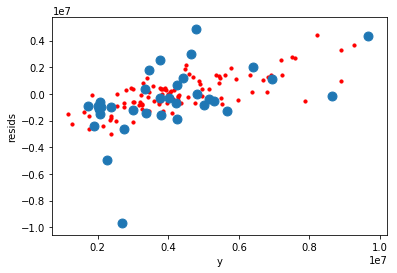

In [37]:
# Make predictions
y_pred_train = lr_rev.predict(X_train)
y_pred_test = lr_rev.predict(X_test)
# Create residuals (aka errors): (y - y_hat)
resids_train = y_rev_train - y_pred_train
resids_test = y_rev_test - y_pred_test
# plt.scatter(y_train, y_pred_train, s=10);
# plt.scatter(y_test, y_pred_test, s=20);

plt.scatter(y_rev_train, resids_train, s=10, c='r');
plt.scatter(y_rev_test, resids_test, s=80);
plt.xlabel('y')
plt.ylabel('resids');

### The chart above suggests there're a few observations that are generating extreme deviations, as well as slight heterskedasticity.

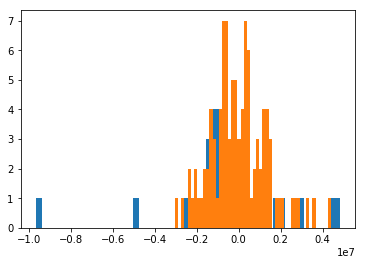

In [38]:
plt.hist(resids_test, bins=50);
plt.hist(resids_train, bins=50);

## Inspect coefficients and metrics for multi-linear regression model

In [39]:
lr_rev.coef_

array([-462674.36489396,  848976.14785534,  486452.56293179,
       -114561.97808262,  351364.43802393, -219666.59955832,
        -26634.46776018,  -85240.49720537,  -44129.60600374,
        -18362.75890633, -768743.95416669, -279548.39848468,
       -459522.24886238,  -59786.83228766,  856888.72089814,
        319141.83728331,  -73325.03232126, -254427.62633761,
       -504308.85766818,  376783.47943415,  776003.02475913,
        133886.75837869, -372464.26846014, -117288.57461638,
       -198184.27421462,  -24108.26016307,   61578.19587547,
        558331.79998691, -909736.80888519,   36520.97893267,
        859608.52053948,  465218.84302991,  244169.39428649,
        459034.00026566, -569974.82656052,  140824.87406936,
       -186117.86211381, -111169.52619505,  492205.95929037,
       -160024.40495374])

### Inspect outputs from StatsModel linear regression model

In [40]:
X_train=sm.add_constant(X_train)
Model_sm=sm.OLS(y_rev_train, X_train).fit()

C:\Users\pozzo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [41]:
Model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.012
Date:                Mon, 02 Nov 2020   Prob (F-statistic):              0.476
Time:                        20:47:36   Log-Likelihood:                -1554.4
No. Observations:                 100   AIC:                             3191.
Df Residuals:                      59   BIC:                             3298.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.425e+06   4.61e+06      0.743      0.461    -5.8e+06    1.27e+07
City Group_Other -4.627e+05   5.71e+05     -0.810      0.421   -1.61e+06     6.8e+05
Type_FC            8.49e+05   3.32e+06      0.255      0.799    -5.8e+06     7.5e+06
Type_IL           4.865e+05   3.33e+06      0.146      0.884   -6.18e+06    7.16e+06
P1               -1.146e+05   3.42e+05     -0.335      0.739      -8e+05    5.71e+05
P2                3.514e+05    3.7e+05      0.949      0.346   -3.89e+05    1.09e+06
P3               -2.197e+05   5.12e+05     -0.429      0.670   -1.24e+06    8.05e+05
P4               -2.663e+04   5.07e+05     -0.053      0.958   -1.04e+06    9.88e+05
P5               -8.524e+04   4.11e+05     -0.207      0.836   -9.08e+05    7.37e+05
P6               -4.413e+04   2.63e+05     -0.168      0.867   -5.71e+05    4.82e+05
P7               -1.836e+04   2.69e+05     -0.068      0.946   -5.57e+05    5.21e+05
P8               -7.687e+05   5.06e+05     -1.520      0.134   -1.78e+06    2.43e+05
P9               -2.795e+05   1.03e+06     -0.271      0.787   -2.34e+06    1.79e+06
P10              -4.595e+05   1.56e+06     -0.294      0.770   -3.59e+06    2.67e+06
P11              -5.979e+04   2.93e+05     -0.204      0.839   -6.46e+05    5.26e+05
P12               8.569e+05   6.94e+05      1.235      0.222   -5.32e+05    2.25e+06
P13               3.191e+05   1.46e+06      0.219      0.828    -2.6e+06    3.24e+06
P14              -7.333e+04   3.71e+05     -0.198      0.844   -8.16e+05    6.69e+05
P15              -2.544e+05   5.27e+05     -0.483      0.631   -1.31e+06       8e+05
P16              -5.043e+05   5.88e+05     -0.857      0.395   -1.68e+06    6.73e+05
P17               3.768e+05   3.33e+05      1.130      0.263    -2.9e+05    1.04e+06
P18                7.76e+05   5.32e+05      1.459      0.150   -2.88e+05    1.84e+06
P19               1.339e+05   1.65e+05      0.810      0.421   -1.97e+05    4.65e+05
P20              -3.725e+05   2.22e+05     -1.675      0.099   -8.17e+05    7.24e+04
P21              -1.173e+05    2.1e+05     -0.559      0.578   -5.37e+05    3.02e+05
P22              -1.982e+05   2.43e+05     -0.816      0.418   -6.84e+05    2.88e+05
P23              -2.411e+04   1.48e+05     -0.163      0.871    -3.2e+05    2.72e+05
P24               6.158e+04   5.09e+05      0.121      0.904   -9.58e+05    1.08e+06
P25               5.583e+05   4.95e+05      1.129      0.263   -4.31e+05    1.55e+06
P26              -9.097e+05   5.64e+05     -1.612      0.112   -2.04e+06    2.19e+05
P27               3.652e+04   2.16e+05      0.169      0.866   -3.95e+05    4.68e+05
P28               8.596e+05   2.85e+05      3.017      0.004     2.9e+05    1.43e+06
P29               4.652e+05   3.18e+05      1.464      0.148   -1.71e+05     1.1e+06
P30               2.442

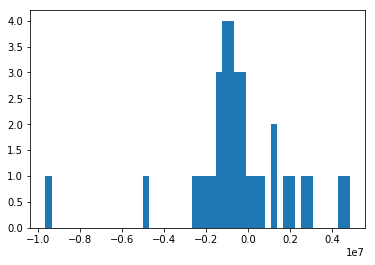

In [42]:
plt.hist(resids_test, bins=50);

In [43]:
SSE=Model_sm.mse_resid*Model_sm.nobs
MSE=Model_sm.mse_resid
RMSE=MSE**.5

## KNN regressor model

In [44]:
# features =['City Group_Other', 'Type_FC', 'Type_IL', 'P1', 'P2', 'P3', 'P4', 'P5',
#            'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
#            'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26','P27',
#            'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36','P37'
#           ]


# features =['City Group_Other', 'Type_FC', 'Type_IL', 'P2', 'P6', 'P8', 'P13', 'P28', 'P29'
#           ]

X = eatz_4[features]
y = eatz_4['rev_root']

In [45]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
ss = StandardScaler()           # normalizes data to Z-score, stds from mean
ss.fit(X_train)                 # ONLY FIT TO X_TRAIN, NEVER TO TEST!!!!

# X_train_sc
X_train_sc = ss.transform(X_train)      # transform data to Z-score basis

# X_test_sc
X_test_sc = ss.transform(X_test)

C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pozzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\pozzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [47]:
knn_gridsearch = GridSearchCV(estimator=KNeighborsRegressor(),
                              param_grid = {'n_neighbors': range(2, 4, 8),
                                              'metric': ['euclidean', 'manhattan']
                                              },
                              cv=5, # What number of folds in CV will we use?
                              verbose=1)

# Fit the GridSearchCV object to the data.
knn_gridsearch.fit(X_train_sc, y_train);

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


rmse_knn:  379673.9248317758


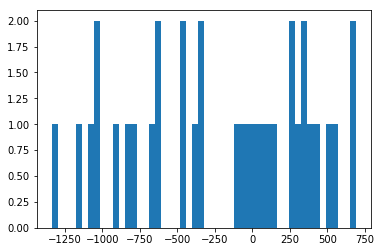

In [48]:
y_test_preds = knn_gridsearch.predict(X_test)
resids = y_test - y_test_preds
plt.hist(resids, bins=50);

rmse_knn_test = mean_squared_error(y_test, y_test_preds)
rmse_knn_train = mean_squared_error(y_test, y_test_preds)
print('rmse_knn: ', rmse_knn_test )

### Random Forest regressor

In [49]:
grid = GridSearchCV(estimator = RandomForestRegressor(),
                    param_grid = {
                                    'max_depth': [2, 7],
                                    'min_samples_split': [5, 20],
                                    'min_samples_leaf': [2, 6],
                                    "max_features": [0.5, 1.0],
                                    "bootstrap": [True, False]
                                 },
                    cv = 5,
                    verbose = 1)

import time

# Start our timer.
t0 = time.time()

# Let's GridSearch over the above parameters on our training data.
%time grid.fit(X_train, y_train)

# Stop our timer and print the result.
print(time.time() - t0)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarn

C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

Wall time: 4.05 s
4.047257661819458


C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    3.9s finished
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rmse_random_forest-test:  186953.28170087538


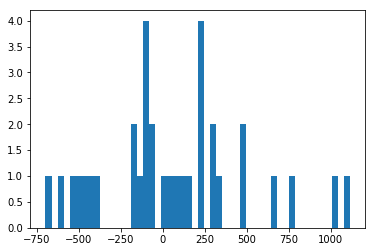

In [50]:
from sklearn.metrics import mean_squared_error 
y_test_preds = grid.predict(X_test)
resids = y_test - y_test_preds
plt.hist(resids, bins=50);

rmse_random_forest = mean_squared_error(y_test, y_test_preds)
print('rmse_random_forest-test: ', rmse_random_forest)

### Scores for three models

In [51]:
print('rmse_linear_regression_test: {:>10,.0f}'.format(RMSE ))
print('rmse_knn_test: {:>24,.0f}'.format( rmse_knn_test ))
print('rmse_random_forest-test:  {:>13,.0f}'.format(rmse_random_forest))

rmse_linear_regression_test:  1,773,509
rmse_knn_test:                  379,674
rmse_random_forest-test:        186,953
